<a href="https://colab.research.google.com/github/romenlaw/NaiveNeuralNetwork/blob/main/tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Git

In [1]:
!git config --global user.name "romenlaw"
!git config --global user.email "e"
TOKEN='github_pat_'
!git clone https://$TOKEN@github.com/romenlaw/NaiveNeuralNetwork

Cloning into 'NaiveNeuralNetwork'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 131 (delta 60), reused 39 (delta 11), pack-reused 0
Receiving objects: 100% (131/131), 65.82 KiB | 1.04 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [2]:
%cd /content/NaiveNeuralNetwork

/content/NaiveNeuralNetwork


In [3]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [105]:
!git add nnn.py visualiser.py __init__.py
!git status

On branch main
Your branch and 'origin/main' have diverged,
and have 1 and 1 different commits each, respectively.
  (use "git pull" to merge the remote branch into yours)

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	__pycache__/

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
!git reset

Unstaged changes after reset:
M	__pycache__/nnn.cpython-310.pyc
M	nnn.py
M	visualiser.py


In [101]:
!git commit -m "save before lunch"

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	__pycache__/

nothing added to commit but untracked files present (use "git add" to track)


In [103]:
!git push origin main

To https://github.com/romenlaw/NaiveNeuralNetwork
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/romenlaw/NaiveNeuralNetwork'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [104]:
!git pull origin main

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 30.26 KiB | 1.04 MiB/s, done.
From https://github.com/romenlaw/NaiveNeuralNetwork
 * branch            main       -> FETCH_HEAD
   3899340..47c0486  main       -> origin/main
hint: You have divergent branches and need to specify how to reconcile them.
hint: You can do so by running one of the following commands sometime before
hint: your next pull:
hint: 
hint:   git config pull.rebase false  # merge (the default strategy)
hint:   git config pull.rebase true   # rebase
hint:   git config pull.ff only       # fast-forward only
hint: 
hint: You can replace "git config" with "git config --global" to set a default
hint: preference for all repositories. You can also pass --rebase, --no-rebase,
hint: or --ff-only on the command line to override the configured default per
hin

# Housekeeping

In [4]:
!pwd

/content/NaiveNeuralNetwork


In [5]:
import sys
sys.path.append('/content/NaiveNeuralNetwork')

%load_ext autoreload
%autoreload 2

In [37]:
from nnn import Scalar, Neuron
from visualiser import *


# Visualise

In [11]:
a=Scalar(2., label='a')
b=Scalar(-3, label='b')
c=Scalar(10, label='c')
e=a*b; e.label='e'
d=e+c+b; d.label='d'
f=d/e; f.label='f'
L=(-f).relu(); L.label='L'


In [ ]:
import graphviz
from visualiser import *

In [12]:
L.backward()

[L: 0.16666666666666666, : 0.16666666666666666, : -1, f: -0.16666666666666666, : -0.16666666666666666, d: 1.0, : 4.0, c: 10, e: -6.0, b: -3, a: 2.0]


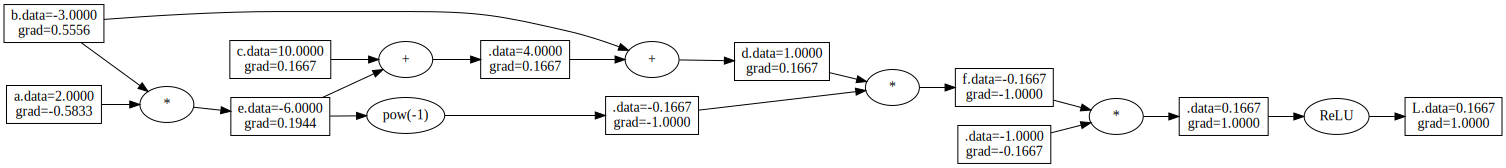

In [13]:
visualise(L)

# Gradient

In [26]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (5,3)

In [16]:
def f(x):
  return 3*x**2 - 4 * x + 5

In [ ]:
f(2.0)

9.0

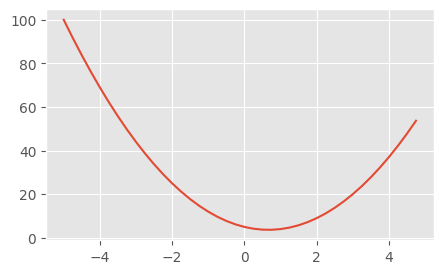

In [24]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

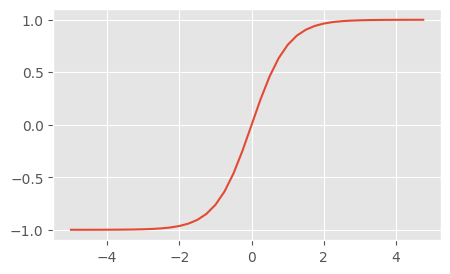

In [27]:
xs = np.arange(-5, 5, 0.25)
ys = np.tanh(xs)
plt.plot(xs, ys)

The definition of [derivitive](https://en.wikipedia.org/wiki/Derivative) as a limit is that
$$L=\lim_{h \to 0} \dfrac{f_{(a+h)} - f_{(h)}} {h}$$

In [ ]:
h=1e-7
a=2.0
(f(a+h)-f(a))/h

8.000000288888032

Numerically check against the Scalar backward() results.

In [10]:
def lol():
  a=Scalar(2., label='a')
  b=Scalar(-3, label='b')
  c=Scalar(10, label='c')
  e=a*b; e.label='e'
  d=e+c+b; d.label='d'
  f=d*e; f.label='f'
  L1=f.data


  h=1e-4
  a=Scalar(2., label='a')
  b=Scalar(-3, label='b')+h
  c=Scalar(10, label='c')
  e=a*b; e.label='e'
  d=e+c+b; d.label='d'
  f=d*e; f.label='f'
  L2=f.data

  print((L2-L1)/h)

lol()

-15.999400000037411


# Test with MLP

In [28]:
import torch

In [29]:
x1 = torch.Tensor([2.0]).double().requires_grad_(True)
x2 = torch.Tensor([0.0]).double().requires_grad_(True)
w1 = torch.Tensor([-3.0]).double().requires_grad_(True)
w2 = torch.Tensor([1.0]).double().requires_grad_(True)
b = torch.Tensor([6.8813735870195432]).double().requires_grad_(True)
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)
print(o.data.item())
o.backward()
print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [91]:
from nnn import *

In [74]:
X = [0.3, -2.7, 2.5]
mlp = MLP(3, [4,4,1])
mlp(X)


: -0.8639426453445713

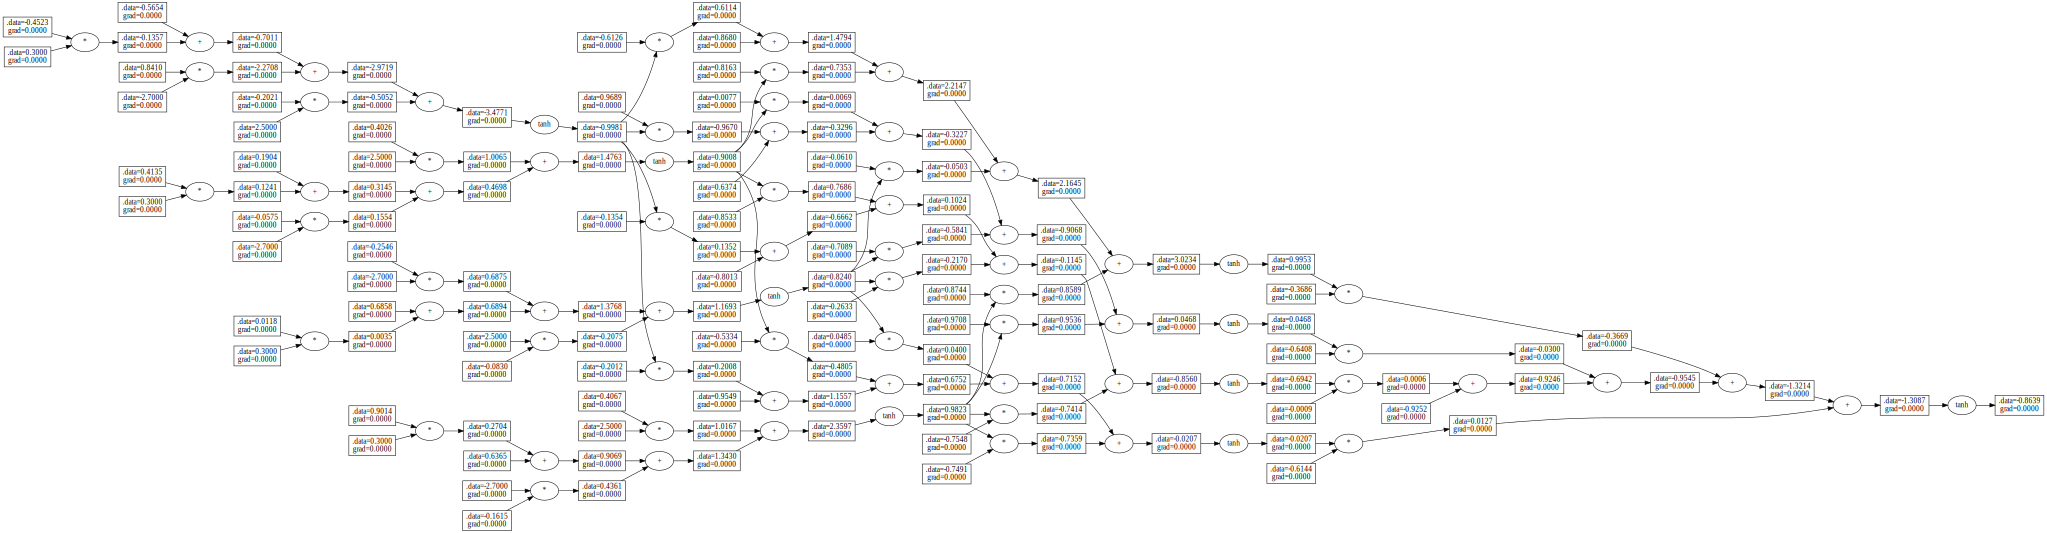

In [75]:
visualise(mlp(X))

In [93]:
batch_x = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

batch_y = [1.0, -1.0, -1.0, 1.0] # ground true of y

mlp = MLP(3, [4,4,1])
y_pred = [mlp(x) for x in batch_x]
y_pred

[: 0.2815247751988241,
 : 0.6813421270513947,
 : 0.44296204207160833,
 : 0.5347257354530428]

In [94]:
loss = [(y_pred[i]-batch_y[i])**2 for i in range(len(batch_y))]
loss

[: 0.5162066486531002,
 : 2.826911348197708,
 : 2.082139454859466,
 : 0.2164801412497119]

In [95]:
loss = sum(loss)
loss

: 5.641737592959986

In [96]:
loss.backward()

[: 5.641737592959986, : 0.2164801412497119, : -0.4652742645469572, : -1.0, : 0.5347257354530428, : 0.5967399610705489, : -0.24117524439016072, : 0.8864212526406274, : 1.4049701951409224, : 0.8444729684213341, : 0.5604972267195882, : -0.25988590668213224, : 0.8203831334017204, : -0.15488283561404664, : 0.9752659690157671, : 0.5932693373566259, : 0.8379152054607096, : 0.8274272699545998, : -0.9160021784598703, : -1.563602615526222, : -0.5477972556241001, : -1.015805359902122, : 0.053243279251243954, : -1.069048639153366, : 0.07785817555106016, : -1.1469068147044261, : -0.6033548130984779, : 0.010487935506109838, : -0.05893453469921121, : 0.09348790212169546, : 0.0937617004011454, : 0.9378954031238609, : -0.8441337027227155, : -0.2471473715197308, : -0.5969863312029847, : -0.1752046412091531, : -0.4217816899938316, : -0.1350839269924278, : 0.06942247020532105, : 0.31825478738208185, : -0.5872391699720696, : -0.6734415468605048, : 0.4425824846079666, : -0.9770442346714864, : -2.22789454001

In [97]:
mlp.layers[0].neurons[0].parameters

<bound method Neuron.parameters of <nnn.Neuron object at 0x7928292106a0>>

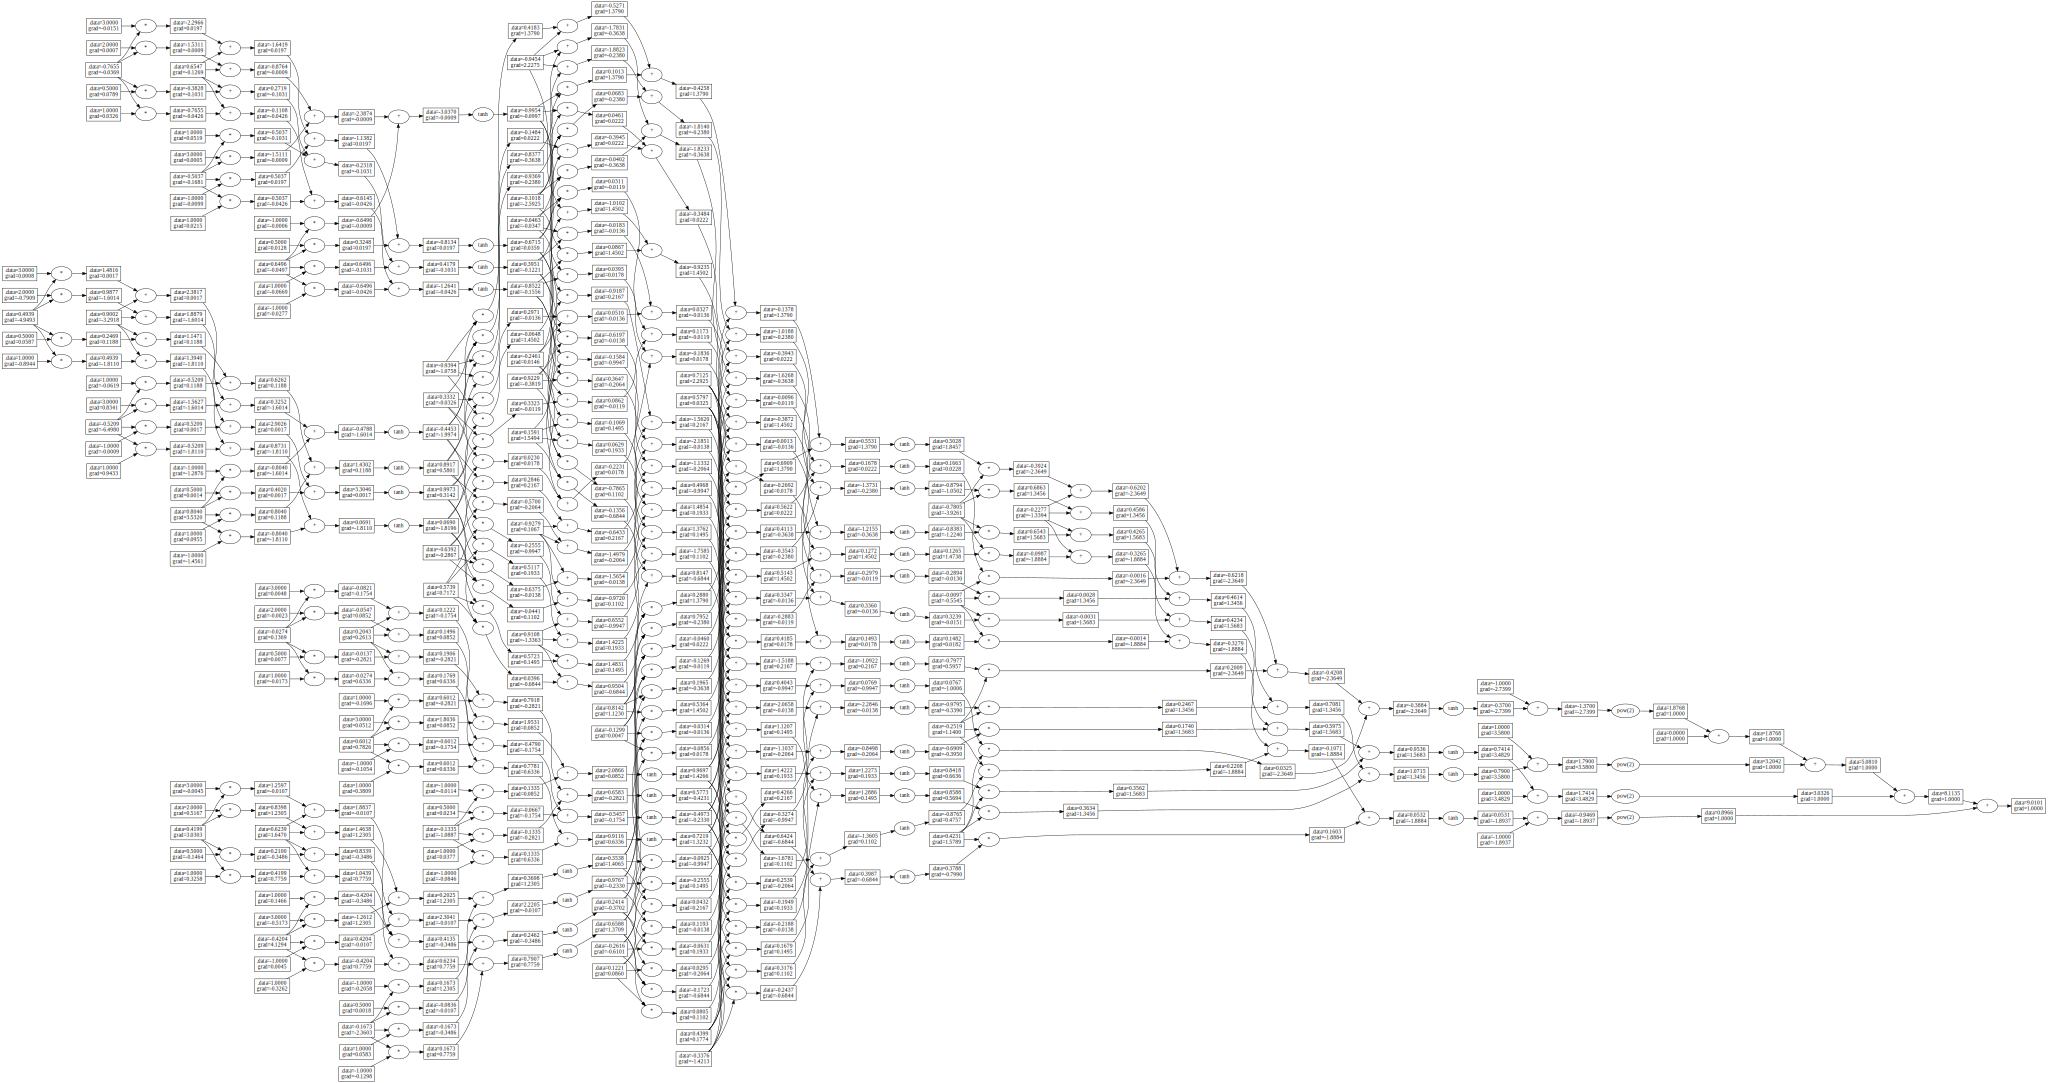

In [89]:
visualise(loss)